### Importing Modules

In [1]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pencil as pc
from IPython.display import display, Math, Latex

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc
$ conda install -c plotly plotly-orca psutil requests


In [2]:
plt.rcParams.update({'font.size': 16})
plt.rcParams['text.usetex'] = True

## Variation of Thermodynamic Variables along z

### reading xy_aver file and grid

In [3]:
#reading the xy_aver file
xya=pc.read.aver(plane_list=['xy'])
#reading the grid
grid = pc.read.grid(trim=True)
z = grid.z

['xy'] ['xyaver.in'] ['xyaverages.dat']
['bxmz', 'bymz', 'rhomz', 'TTmz', 'ppmz', 'ssmz']
var_index -1
var_index -1
var_index -1
var_index -1
var_index -1
var_index -1
reading grid data from processor 27 of 128 ...
reading grid data from processor 98 of 128 ...
reading grid data from processor 54 of 128 ...
reading grid data from processor 39 of 128 ...
reading grid data from processor 57 of 128 ...
reading grid data from processor 86 of 128 ...
reading grid data from processor 19 of 128 ...
reading grid data from processor 119 of 128 ...
reading grid data from processor 92 of 128 ...
reading grid data from processor 71 of 128 ...
reading grid data from processor 70 of 128 ...
reading grid data from processor 56 of 128 ...
reading grid data from processor 103 of 128 ...
reading grid data from processor 30 of 128 ...
reading grid data from processor 112 of 128 ...


reading grid data from processor 40 of 128 ...
reading grid data from processor 126 of 128 ...
reading grid data from processor 60 of 128 ...
reading grid data from processor 89 of 128 ...
reading grid data from processor 62 of 128 ...
reading grid data from processor 93 of 128 ...
reading grid data from processor 87 of 128 ...
reading grid data from processor 118 of 128 ...
reading grid data from processor 117 of 128 ...
reading grid data from processor 91 of 128 ...
reading grid data from processor 116 of 128 ...
reading grid data from processor 69 of 128 ...
reading grid data from processor 5 of 128 ...
reading grid data from processor 107 of 128 ...
reading grid data from processor 1 of 128 ...
reading grid data from processor 76 of 128 ...
reading grid data from processor 2 of 128 ...
reading grid data from processor 47 of 128 ...
reading grid data from processor 108 of 128 ...
reading grid data from processor 83 of 128 ...
reading grid data from processor 111 of 128 ...
reading g

### reading density and temperature from xy_aver

In [4]:
rho = xya.xy.rhomz[-1,:]
#pre = xya.xy.ppmz[-1,:]
temp = xya.xy.TTmz[-1,:]

### calculating pressure

In [5]:
#reading the var file
var = pc.read.var(magic=["pp"], trimall=True)

In [6]:
#calculating pressure profile by averaging the var file in xy plane
pressure = np.average(var.pp, axis=(-1,-2))

### plotting 

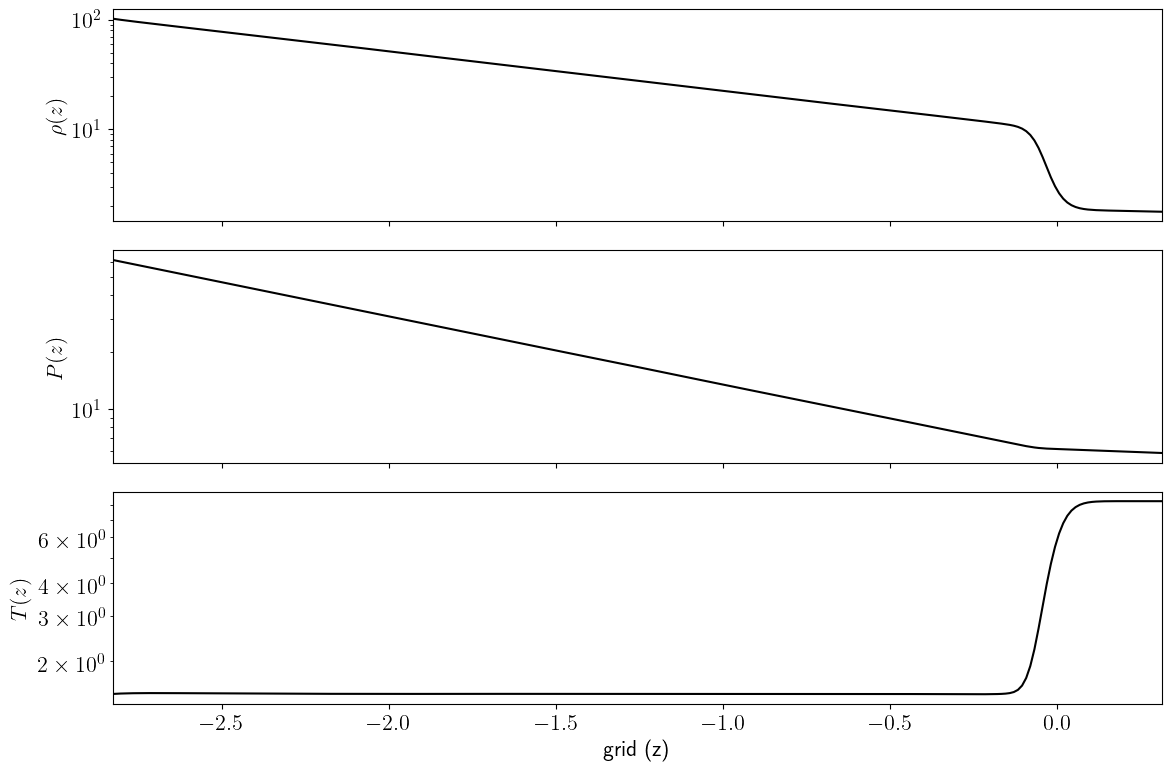

In [7]:
l=-9*np.pi/10
u=np.pi/10

fig, axs = plt.subplots(3,1, figsize=(12,8), sharex=True)

axs[0].plot(grid.z, rho, color='k')
axs[1].plot(grid.z, pressure, color='k')
#axs[1].plot(grid.z, pre, color='k')
axs[2].plot(grid.z, temp, color='k')
#axs[2].plot(grid.z, xya.xy.TTmz[-1], color='k')

axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[2].set_yscale("log")

axs[0].set_xlim(l, u)
axs[1].set_xlim(l, u)
axs[2].set_xlim(l, u)

axs[0].set_ylabel(r"$\rho(z)$")
axs[1].set_ylabel(r"$P(z)$")
axs[2].set_ylabel(r"$T(z)$")


plt.xlabel("grid (z)")
plt.tight_layout()
#plt.savefig("variation.jpg")

## determining the temp of the lower layer

### reading timeseries data

In [8]:
ts = pc.read.ts()

Read 12080 lines.


In [9]:
def g(t, a):
    return a

i_l = np.argmin(abs(z+2.5))
j_l = np.argmin(abs(z+1.5))

z_l = z[i_l:j_l]
T_l = temp[i_l:j_l]

popt_l, pcov_l = curve_fit(g, z_l, T_l)

z_fit_l = ts.t[i_l:j_l]
T_fit_l = g(z_fit_l, popt_l[0])
T_ave_l = round(np.average(T_fit_l),3)
display(Latex(fr'$T_d$ = {T_ave_l}'))

<IPython.core.display.Latex object>

In [10]:
i_u = np.argmin(abs(z-0.01))
j_u = np.argmin(abs(z-0.5))

z_u = z[i_u:j_u]
T_u = temp[i_u:j_u]

popt_u, pcov_u = curve_fit(g, z_u, T_u)

z_fit_u = ts.t[i_u:j_u]
T_fit_u = g(z_fit_u, popt_u[0])
T_ave_u = round(np.average(T_fit_u),3)
display(Latex(fr'$T_u$ = {T_ave_u}'))

<IPython.core.display.Latex object>

## Calculating other parameters

In [11]:
param = pc.read.param()
cp = param.cp
display(Latex(fr'$c_p$ = {cp}'))
gamma = np.round(param.gamma, 3)
display(Latex(fr'$\gamma$ = {gamma}'))
R = np.round(cp*(1-(1/gamma)), 4)
display(Latex(fr'$R$ = {R}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [12]:
cs_d = np.round(np.sqrt(gamma*R*T_ave_l), 3)
display(Latex(fr'$c_{{sd}}$ = {cs_d}'))
cs_u = np.round(np.sqrt(gamma*R*T_ave_u), 3)
display(Latex(fr'$c_{{su}}$ = {cs_u}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [13]:
g = 1
L0 = np.round(cs_d**2/g, 3)
display(Latex(fr'$L_0$ = {L0}'))
omega0 = np.round(g/cs_d, 3)
display(Latex(fr'$\omega_0$ = {omega0}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [14]:
#for st_li2ne fi2tti2ng
def g(t, a, b):
    return a*t+b

i2 = np.argmin(abs(ts.t-200))
j2 = np.argmin(abs(ts.t-800))

t_lin = ts.t[i2:j2]
u_lin = ts.urms[i2:j2]

popt, pcov = curve_fit(g, t_lin, u_lin)

t_fit = ts.t[i2:j2]
u_fit = g(t_fit, popt[0], popt[1])
u_ave = round(np.average(u_fit),4)
display(Latex(fr'$u_{{rms}}$ = {u_ave}'))
#np.shape(i2)
#u_fit

<IPython.core.display.Latex object>

### plotting 

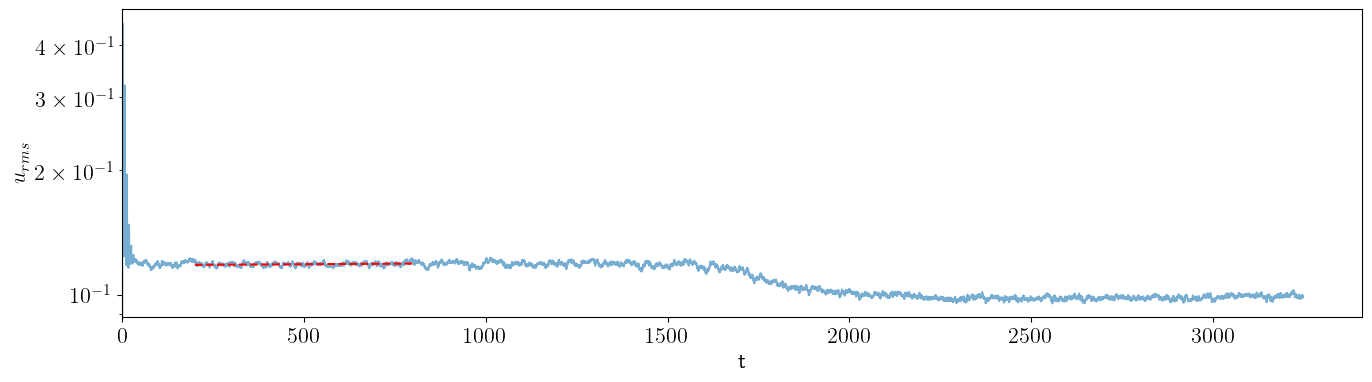

In [15]:
fig = plt.figure(figsize=(16,4))
plt.plot(ts.t, ts.urms, alpha=0.6)
plt.plot(t_fit, u_fit, '--r')
plt.yscale('log')
plt.xlim(0,)
plt.xlabel("t")
plt.ylabel(r"$u_{rms}$")
plt.show()

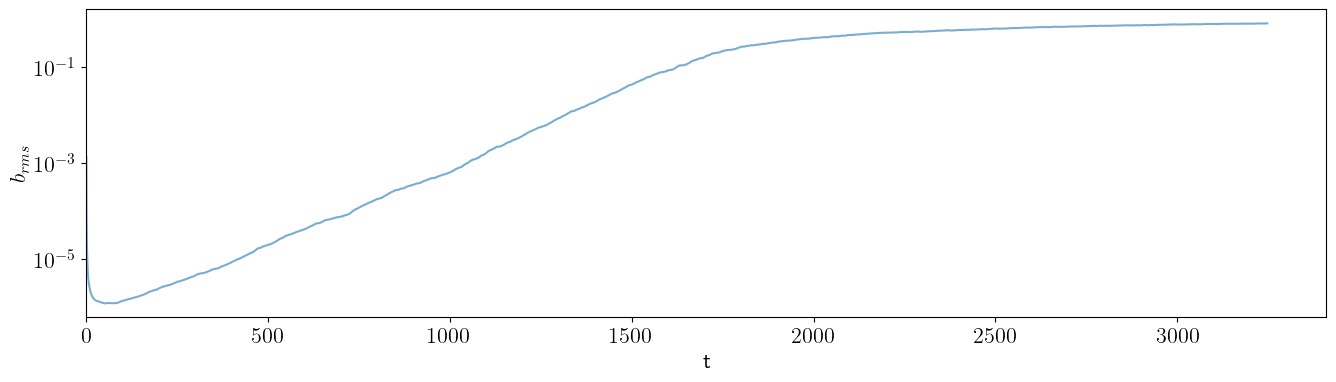

In [16]:
fig = plt.figure(figsize=(16,4))
plt.semilogy(ts.t, ts.brms, alpha=0.6)
#plt.plot(t_fit, u_fit, '--r')
plt.yscale('log')
plt.xlim(0,)
plt.xlabel("t")
plt.ylabel(r"$b_{rms}$")
plt.show()

In [17]:
D = np.round(L0*u_ave/cs_d, 3)
display(Latex(fr'$D$ = {D}'))

<IPython.core.display.Latex object>

## reading yaver.dat 

In [19]:
yaver = pc.read.aver(plane_list='y')

['y'] ['yaver.in'] ['yaverages.dat']
['uzmxz', 'ssmxz']


ValueError: could not broadcast input array from shape (8122,2,16,200) into shape (8121,2,16,200)

### We can notice that $u_{rms}$ saturates at around $t=100$, hence we will consider $u_z(t,x,z)$ after this $t$    
Here we have taken t=100

In [ ]:
uz_real = yaver.y.uzmxz

In [ ]:
size = np.shape(uz_real)
#size
nx = size[1]
nz = size[2]
nt = size[0]

tt = yaver.t

readding the parameters

In [ ]:
param = pc.read.param()

In [ ]:
lxyz = param.lxyz   #shape of the box
grz = -param.gravz  #value of g along z direction
cp = param.cp
lx = lxyz[0]
ly = lxyz[1]
lz = lxyz[2]
lz

3.14159

In [ ]:
indx_z_surf = 212    #selecting the plane to observe f-modes
indx_t1 = np.argmin(np.abs(tt - 170))  #to avoid the transient effects below t=170
indx_t2 = -1

In [ ]:
t_gd = tt[indx_t1:indx_t2]  #time interval where urms has reached a steady state
t_len = np.size(t_gd)

dkx = 2*np.pi/lx    #unit step along kx direction
dom = 2*np.pi/t_len #unit step alomg omega direction

shape of the data

In [ ]:
uz_real[indx_t1:indx_t2,:,indx_z_surf].shape

(6477, 400)

### taking fourier transform of $u_z(t,x,z=0)$ to get $\hat{u}_z(\omega,k_x)$

In [ ]:
uz_fourier = np.fft.fftn(uz_real[indx_t1:indx_t2,:,indx_z_surf], s=None, axes=(-2, -1), norm=None)

In [ ]:
#uz_fourier[para_0, 2]

### we can construct the dimensionless quantity 
$\tilde{P}(\omega,k_x)=\frac{|\hat{u}_z|}{D^2}$

In [ ]:
logP = np.log(np.abs(uz_fourier/D**2))

### defining $\tilde{k}_x=k_xL_0, \hspace{2mm} \tilde{\omega}=\frac{\omega}{\omega_0}$

In [ ]:
if t_len%2 == 0:
    fom = np.arange(0, t_len/2+1)
    rom = -np.flip(np.arange(1, t_len/2))
    om = np.concatenate((fom, rom))*dom
else:
    fom = np.arange(0, t_len/2)
    rom = -np.flip(np.arange(1, t_len/2))
    om = np.concatenate((fom, rom))*dom

In [ ]:
if nx%2 == 0:
    fnx = np.arange(0, nx/2+1)
    rnx = -np.flip(np.arange(1, nx/2))
    kx = np.concatenate((fnx, rnx))*dkx
else:
    fnx = np.arange(0, nx/2)
    rnx = -np.flip(np.arange(1, nx/2))
    kx = np.concatenate((fnx, rnx))*dkx

In [ ]:
om.shape, kx.shape 

((6477,), (400,))

In [ ]:
k_tilde = kx*L0
om_tilde = om/omega0
np.shape(om_tilde), np.shape(k_tilde), np.shape(logP)

((6477,), (400,), (6477, 400))

### plotting $\tilde{k}_x-\tilde{\omega}$ diagram

Locator attempting to generate 3333 ticks ([-5.265, ..., 11.395]), which exceeds Locator.MAXTICKS (1000).


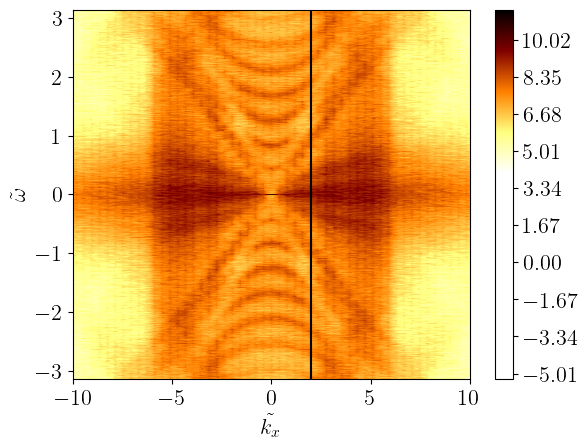

In [33]:
[X, Y] = np.meshgrid(k_tilde, om_tilde)
#plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
plt.contourf(np.fft.fftshift(X), np.fft.fftshift(Y), np.fft.fftshift(logP), 4000, cmap='afmhot_r', vmin=4, vmax=np.max(logP))
#plt.plot(k_tilde, np.sqrt(grz*k_tilde), 'k')
plt.axvline(x=2, c='k')
plt.xlim(-10,10)
#plt.ylim(0,10)
plt.colorbar()
plt.xlabel(r"$\tilde{k_x}$")
plt.ylabel(r"$\tilde{\omega}$")
plt.savefig('k_om.png')
plt.show()

In [34]:
#idl, idu

Locator attempting to generate 3286 ticks ([-5.03, ..., 11.395]), which exceeds Locator.MAXTICKS (1000).


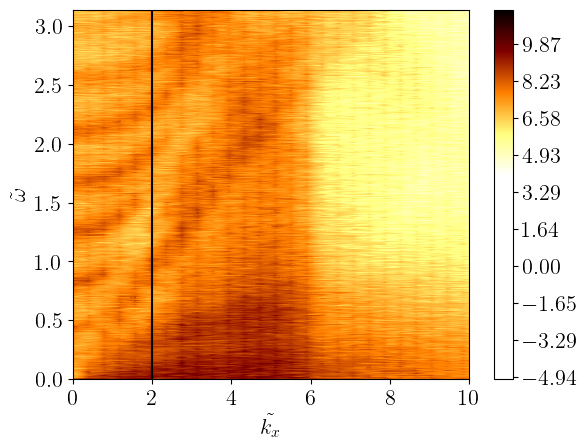

In [35]:
idl = np.argmin(np.abs(om_tilde - 0)) 
idu = np.argmin(np.abs(om_tilde - np.pi))
# print(idu), print(idl)

fig, ax = plt.subplots()
[X, Y] = np.meshgrid(k_tilde[0:int(nx/2+1)], om_tilde[idl:idu])
#plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
#cont = ax.contourf(X, Y, logP[idl:idu, 0:int(nx/2+1)], 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
cont = ax.contourf(X, Y, logP[idl:idu, 0:int(nx/2+1)], 4000, cmap='afmhot_r', vmin=4, vmax=np.max(logP))
#plt.plot(k_tilde, np.sqrt(grz*k_tilde), 'k')
plt.axvline(x=2, c='k')
plt.xlim(0,10)
#plt.ylim(0,10)
plt.colorbar(cont)
plt.xlabel(r"$\tilde{k_x}$")
plt.ylabel(r"$\tilde{\omega}$")
plt.show()

In [36]:
kx[0]-kx[1]

-0.39269908169872414

### finding $\tilde{P}(\tilde{\omega},\tilde{k}_x=2)$

In [37]:
P_k2 = np.abs(uz_fourier[:,2]/D**2)
P_k4 = np.abs(uz_fourier[:,4]/D**2)

In [38]:
kz = []
L_sd = np.pi*(5/6)*L0
for i in range(10):
    kz.append(np.pi*(i+0.5)/L_sd)

### plotting $\tilde{P}(\tilde{\omega},\tilde{k_x}=2)$ as a function of $\tilde{\omega}$

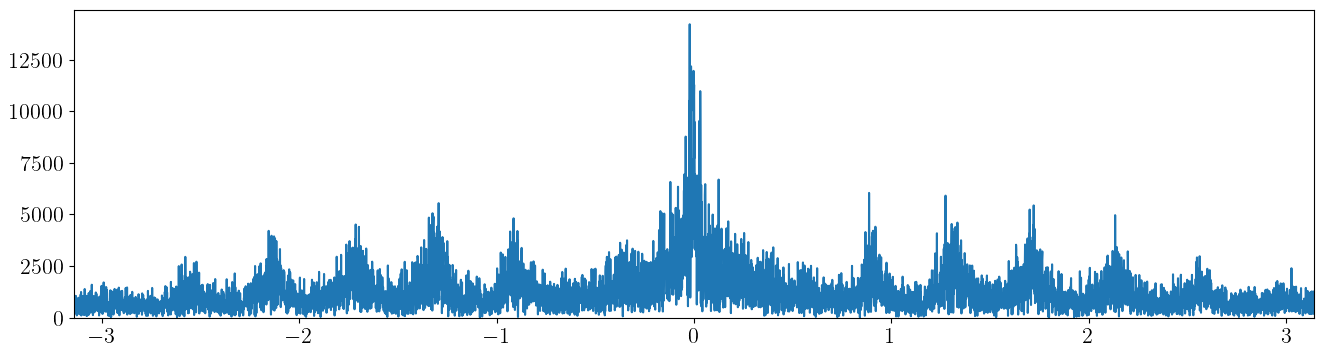

In [39]:
fig = plt.figure(figsize=(16,4))
# for i in range(len(kz)):
#     plt.axvline(x = kz[i], color = 'b')

plt.plot(np.fft.fftshift(om_tilde[1:]), np.fft.fftshift(P_k2[1:]))    # NOTE:Phere we have used the fftshift to 
plt.ylim(0,)                                                                         #Shift the zero-frequency component to the center of the spectrum
plt.xlim(-np.pi, np.pi)

plt.show()

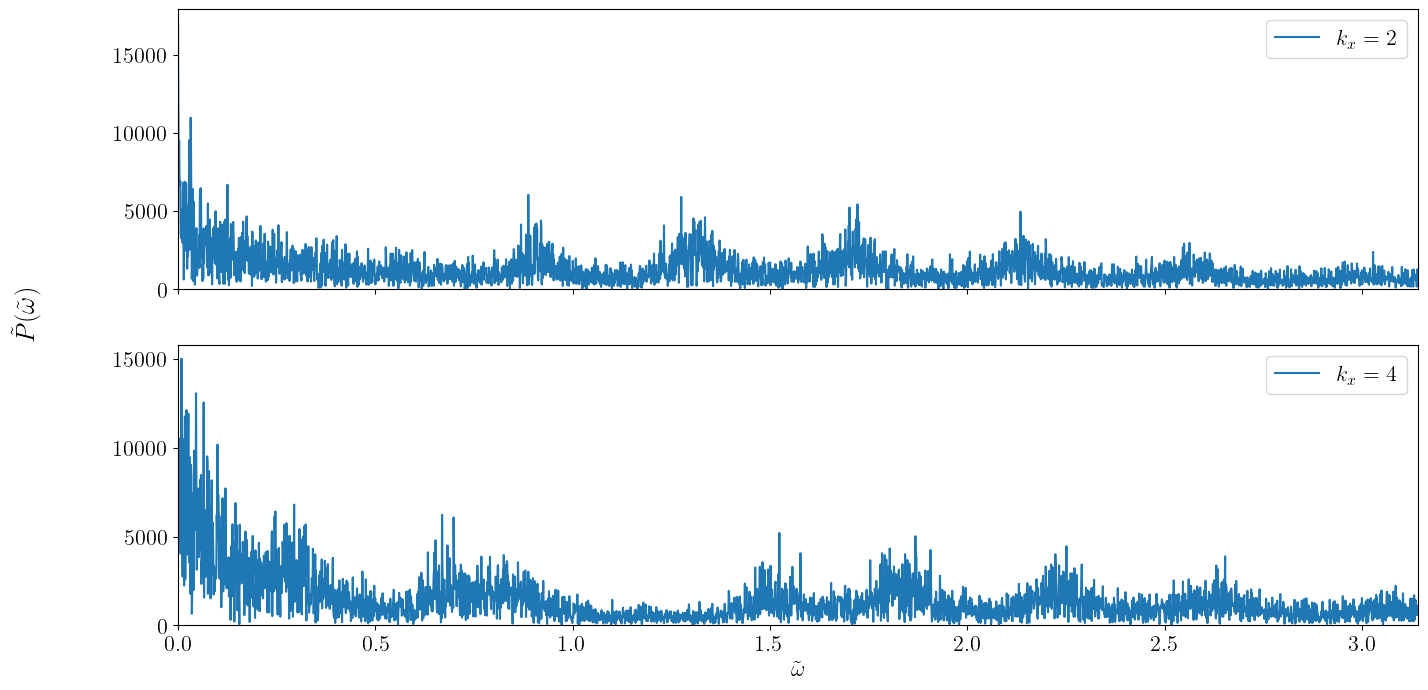

In [40]:
fig, axs = plt.subplots(2,1, sharex=True, figsize=(16,8))

axs[0].plot(om_tilde[idl:idu], P_k2[idl:idu], label=r'$k_x=2$')
# for i in range(len(kz)):
#     plt.axvline(x = kz[i], color = 'b')
axs[0].set_xlim(0, np.pi)
axs[0].set_ylim(0,)
axs[0].legend()

axs[1].plot(om_tilde[idl:idu], P_k4[idl:idu], label=r'$k_x=4$')
axs[1].set_ylim(0,)
axs[1].legend()

plt.xlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout
plt.show()

# fitting

In [41]:
P_k2 = np.abs(uz_fourier[:,2]/D**2)

In [42]:
k_int = k_tilde[3]-k_tilde[0]
om_int = om_tilde[3]-om_tilde[0]
k_int, om_int

(1.1804534395863648, 0.0029131425576477757)

In [43]:
P_k2_filt = gaussian_filter(P_k2[idl:idu],3)

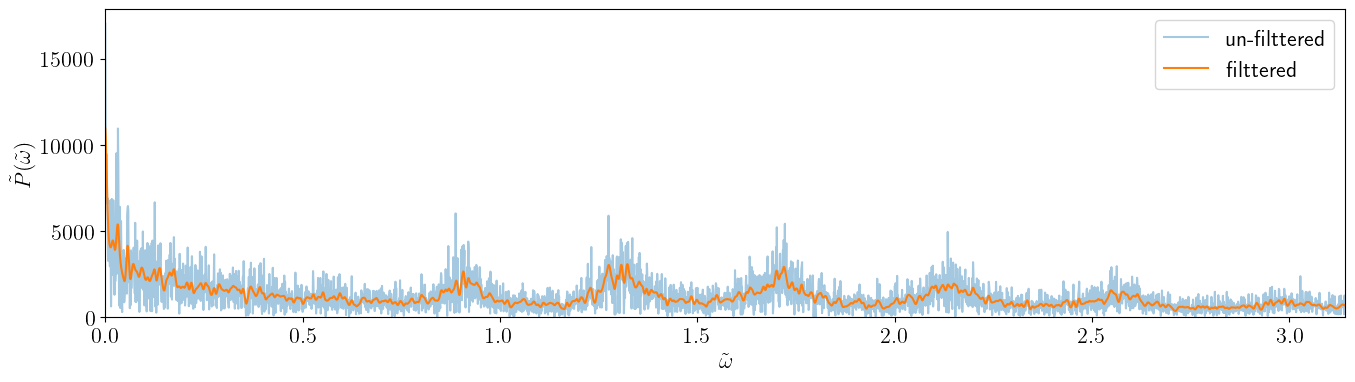

In [44]:
fig = plt.figure(figsize=(16,4))

plt.plot(om_tilde[idl:idu], P_k2[idl:idu], alpha=0.4, label = "un-filttered")
plt.plot(om_tilde[idl:idu], P_k2_filt[idl:idu], alpha=1., label = "filttered")

plt.xlim(0, np.pi)
plt.ylim(0,)
plt.legend(bbox_to_anchor=[1,1], loc='best')
plt.xlabel(r"$\tilde{\omega}$")
plt.ylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.show()

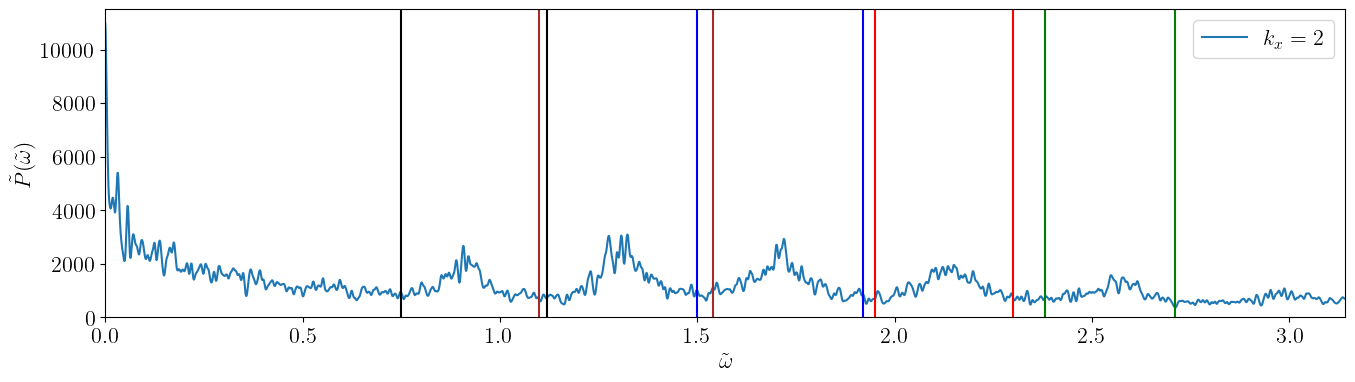

In [45]:
fig = plt.figure(figsize=(16,4))

plt.plot(om_tilde[idl:idu], P_k2_filt[idl:idu], label=r'$k_x=2$')

plt.axvline(x = 0.75, color = 'k')
plt.axvline(x = 1.12, color = 'k')
#plt.axvline(x = para_0[2], color = 'purple')

plt.axvline(x = 1.10, color = 'brown')
plt.axvline(x = 1.54, color = 'brown')

plt.axvline(x = 1.50, color = 'b')
plt.axvline(x = 1.92, color = 'b')

plt.axvline(x = 2.30, color = 'r')
plt.axvline(x = 1.95, color = 'r')

plt.axvline(x = 2.38, color = 'g')
plt.axvline(x = 2.71, color = 'g')

plt.xlim(0, np.pi)
plt.ylim(0,)
plt.legend()

plt.xlabel(r"$\tilde{\omega}$")
plt.ylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout
plt.show()

In [46]:
idl0 = np.argmin(np.abs(om_tilde - 0.75)) 
idu0 = np.argmin(np.abs(om_tilde - 1.12)) 

idl1 = np.argmin(np.abs(om_tilde - 1.10)) 
idu1 = np.argmin(np.abs(om_tilde - 1.54)) 

idl2 = np.argmin(np.abs(om_tilde - 1.50)) 
idu2 = np.argmin(np.abs(om_tilde - 1.92)) 

idl3 = np.argmin(np.abs(om_tilde - 1.95)) 
idu3 = np.argmin(np.abs(om_tilde - 2.30)) 

idl4 = np.argmin(np.abs(om_tilde - 2.38)) 
idu4 = np.argmin(np.abs(om_tilde - 2.71)) 

In [47]:
def gauss(x, a, b, c):
    y = a*np.exp(-1*b*(x-c)**2)
    return y

para_0, cov_0 = curve_fit(gauss, om_tilde[idl0:idu0], P_k2[idl0:idu0], p0=[2000,80,0.90])
fitted_0 = gauss(om_tilde[idl0:idu0], *para_0)

para_1, cov_1 = curve_fit(gauss, om_tilde[idl1:idu1], P_k2[idl1:idu1], p0=[2000,20,1.38])
fitted_1 = gauss(om_tilde[idl1:idu1], *para_1)

para_2, cov_2 = curve_fit(gauss, om_tilde[idl2:idu2], P_k2[idl2:idu2], p0=[2000,20,1.65])
fitted_2 = gauss(om_tilde[idl2:idu2], *para_2)

para_3, cov_3 = curve_fit(gauss, om_tilde[idl3:idu3], P_k2[idl3:idu3], p0=[2000,24,2.15])
fitted_3 = gauss(om_tilde[idl3:idu3], *para_3)

para_4, cov_4 = curve_fit(gauss, om_tilde[idl4:idu4], P_k2[idl4:idu4], p0=[2000,20,2.58])
fitted_4 = gauss(om_tilde[idl4:idu4], *para_4)

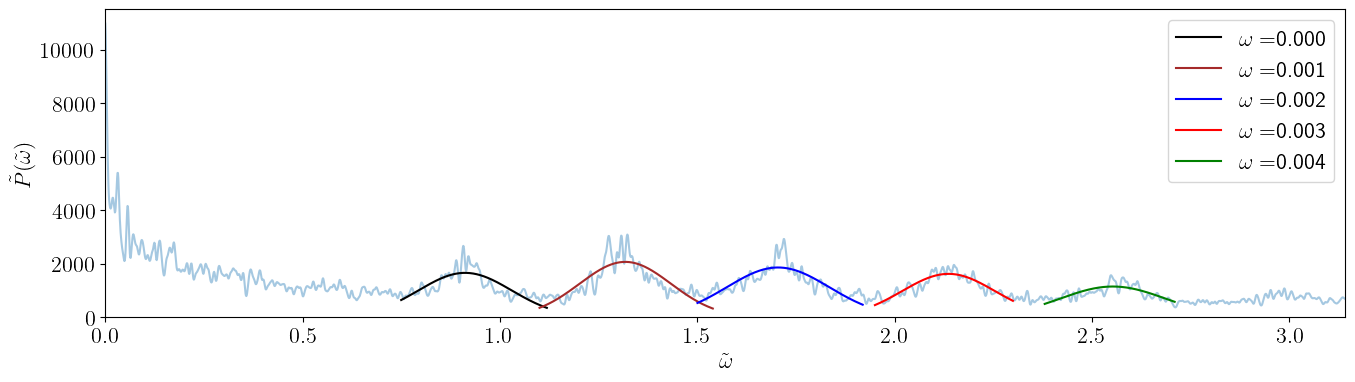

In [48]:
fig = plt.figure(figsize=(16,4))

plt.plot(om_tilde[idl:idu], P_k2_filt[idl:idu], alpha=0.4)

plt.plot(om_tilde[idl0:idu0], fitted_0, color='k', label=fr'$\omega=${om_tilde[0]:.3f}')
plt.plot(om_tilde[idl1:idu1], fitted_1, color='brown', label=fr'$\omega=${om_tilde[1]:.3f}')
plt.plot(om_tilde[idl2:idu2], fitted_2, color='b', label=fr'$\omega=${om_tilde[2]:.3f}')
plt.plot(om_tilde[idl3:idu3], fitted_3, color='r', label=fr'$\omega=${om_tilde[3]:.3f}')
plt.plot(om_tilde[idl4:idu4], fitted_4, color='g', label=fr'$\omega=${om_tilde[4]:.3f}')

plt.xlim(0, np.pi)
plt.ylim(0,)
plt.legend(bbox_to_anchor=[1,1], loc='best')

plt.xlabel(r"$\tilde{\omega}$")
plt.ylabel(r"$\tilde{P}(\tilde{\omega})$")
#plt.tight_layout
plt.show()

In [49]:
indx_z = np.arange(0, 256, 2)
indx_z = np.linspace(-2.6179, 0.52359, 256)

for i in range(len(indx_z)):
    # exec(f'uz_fourier_{i} = np.fft.fftn(uz_real[indx_t1:indx_t2,:,indx_z[{i}]], s=None, axes=(-2, -1), norm=None)')
    exec(f'uz_fourier_{i} = np.fft.fftn(uz_real[indx_t1:indx_t2,:,{i}], s=None, axes=(-2, -1), norm=None)')

In [50]:
labels = []

for i in range(5):
    exec(f'id_om_{i} = np.argmin(np.abs(om_tilde - para_{i}[2]))')
    exec(f'labels.append(para_{i})')

id_kx = np.argmin(np.abs(k_tilde - 2))



In [51]:
array = np.zeros((len(indx_z), 5), dtype='complex') # NOTE: for k_x=2 (tilde) we have found 8 modes.

for i in range(np.size(array, 0)):
    for j in range(np.size(array, 1)):
        exec(f'array[i,j] = uz_fourier_{i}[id_om_{j}, id_kx]')

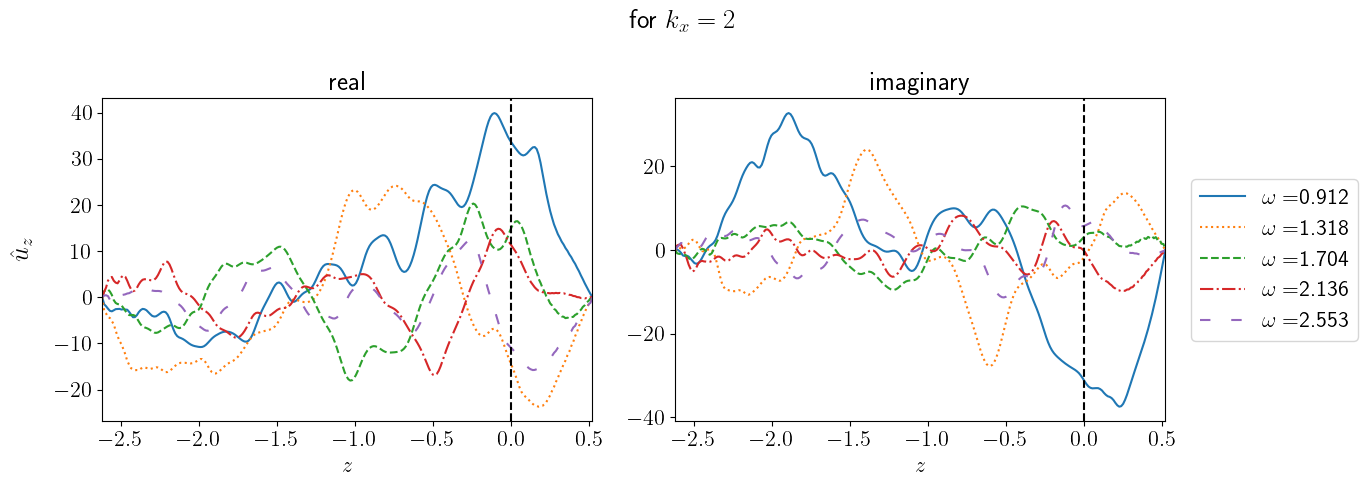

In [52]:
fig, axs = plt.subplots(1,2, figsize=(14,5))
ls = ['-', ':', '--', '-.', (0, (5, 10)), (0, (3, 10, 1, 10)), (5, (10, 3)), (0, (3, 1, 1, 1, 1, 1))]

for i in range(np.size(array, 1)):
    exec(f'temp = id_om_{i}')
    # axs[0].plot(indx_z, np.real(array[:,i]), label=fr'$\omega=$om_tilde[id_om_{i}]')
    axs[0].plot(indx_z, np.real(array[:,i]), ls=ls[i])
    axs[1].plot(indx_z, np.imag(array[:,i]), ls=ls[i], label=fr'$\omega=${om_tilde[temp]:.3f}')#, label=f'id_om_{i}')

axs[0].axvline(x=0, c='k', ls='--')
axs[0].set_xlim(indx_z[0], indx_z[-1])
# axs[0].set_ylim(0,)
# axs[0].legend()
axs[0].set_title(r"real")
axs[0].set_xlabel(r"$z$")

axs[1].axvline(x=0, c='k', ls='--')
axs[1].set_xlim(indx_z[0], indx_z[-1])
# axs[1].set_ylim(0,)
axs[1].legend(bbox_to_anchor=[1.03,0.5], loc='center left')
axs[1].set_title(r"imaginary")
axs[1].set_xlabel(r"$z$")

fig.supylabel(r"$\hat{u}_z$")
plt.suptitle(r'for $k_x=2$')
plt.tight_layout()
plt.show()

In [55]:
var = pc.read.var(magic=["bb"], trimall=True)

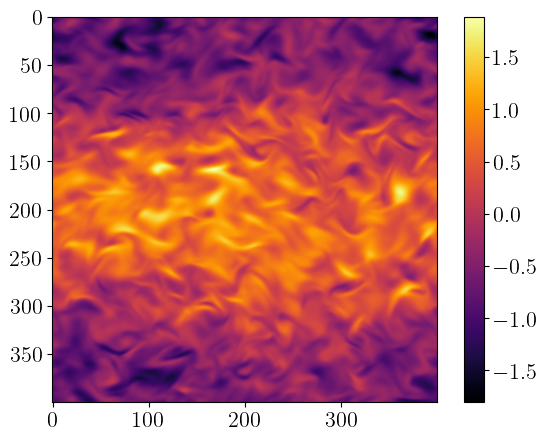

In [56]:
fig = plt.figure(figsize=(7,5))

plt.imshow(var.bb[0,100,:,:], cmap='inferno')
#axes[1].imshow(var.bb[0,:,100,:])
#axes[2].imshow(var.bb[0,:,:,100])
plt.colorbar()

# plt.colorbar()
plt.show()

In [57]:
var.bb.shape

(3, 256, 400, 400)

In [58]:
bxmz=xya.xy.bxmz
bymz=xya.xy.bymz
by = [bxmz, bymz]

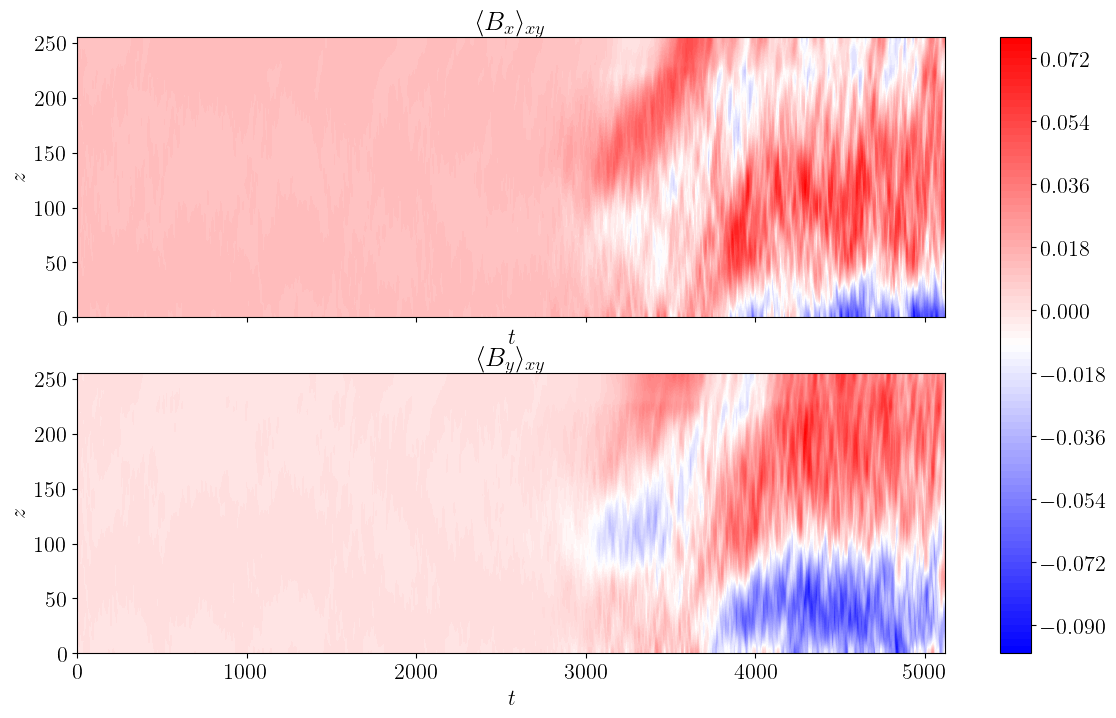

In [59]:
fig, axs = plt.subplots(2,1, figsize=(14,8), sharex=True)

for i in range(len(axs.flat)):
    ims = axs[i].contourf(np.transpose(by[i]),100,cmap='bwr')

#axs[0].contour(np.transpose(bxmz),50,cmap='bwr')
axs[0].set_xlabel(r'$t$')
axs[0].set_ylabel(r'$z$')
axs[0].set_title(r'$\langle B_x \rangle _{xy}$')
axs[0].set_xlim(0,)

#axs[1].contour(np.transpose(bymz),50,cmap='bwr')
axs[1].set_xlabel(r'$t$')
axs[1].set_ylabel(r'$z$')
axs[1].set_title(r'$\langle B_y \rangle _{xy}$')
axs[1].set_xlim(0,)

#cbar_ax = fig.add_axes([1.05, 0.15, 0.05, 0.7])
fig.colorbar(ims, ax=axs.ravel().tolist())
#plt.tight_layout()
#plt.savefig('ave.jpg')
plt.show()

In [60]:
bxmz.shape, bxmz[-1,1]

((5123, 256), -0.0547361)

In [61]:
t = ts.t
t.shape, t[-1]

((10246,), 2760.869)